In [83]:
# goal: reproduce figure 5 from dean's artiphysiology paper
import numpy as np
import torch
import matplotlib.pyplot as plt
import xarray as xr

# params
layer_name = "conv10"

In [85]:
# import apc fits
apc_fits = np.load(f"./../data/apc_fit/vgg16_{layer_name}_apc_fits2.npy",
                  allow_pickle=True)

# import apc models
apc_models = xr.open_dataset("./../data/apc_fit/apc_models_362_16x16.nc")

# import actual responses
outputs_tt = torch.load(f"./../data/net_responses/vgg16_{layer_name}_output.pt")

In [86]:
apc_fits

array([[ 0.00000000e+00,  3.79880000e+04,  2.26506626e-01],
       [ 1.00000000e+00, -1.00000000e+00,            -inf],
       [ 2.00000000e+00,  2.24000000e+03,  2.83940516e-01],
       [ 3.00000000e+00,  2.68800000e+03,  4.01307258e-01]])

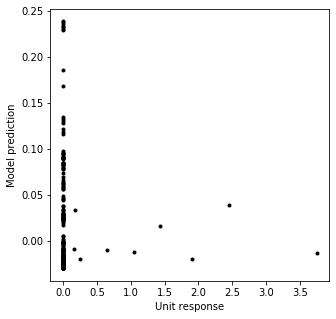

In [96]:
# apc_fits = [(unit, best_model_idx, best_corr)]
def plot_apc_fits_for_unit(unit, apc_fits, apc_models, outputs_tt):
    
    # get x data (actual unit responses across stim)
    spatial_idx = int((len(outputs_tt[0, 0, 0]) - 1) / 2)
    unit_responses = outputs_tt[:, 0, unit, spatial_idx, spatial_idx]
    unit_responses = unit_responses.detach()
    
    # get y data (predicted responses from unit's best fit model)
    (_, i_model, best_corr) = apc_fits[unit]
    model_responses = apc_models.resp[:, int(i_model)]
    
    # plot 'em
    fig, axes = plt.subplots(1, figsize=(5, 5))
    axes.set_xlabel("Unit response")
    axes.set_ylabel("Model prediction")
    
    axes.plot(unit_responses, model_responses, "k.")

plot_apc_fits_for_unit(3, apc_fits, apc_models, outputs_tt)

In [ ]:
def plot_motif_dynamics(w_mon, synapses, N, use_p0=True, save_fig=False):
    """
    Plot motif dynamics a la figure 7 from Ocker et al 2015
    Args:
        w_mon (StateMonitor): Brian2 synaptic weight monitor
        synapses (Synapses): Brian2 synapses in network
        N (int): number of neurons
        save_fig (bool): optional flag to output figure image
    """
    motif_names = ["p", "q_div", "q_con", "q_ch", "q_rec"]
    motif_stats_mat = get_motif_stats_in_time(w_mon, synapses, N, use_p0=use_p0)

    fig, axes = plt.subplots(5, figsize=(5, 10))

    plt.xlabel("Time (s)")
    fig.suptitle("Motif dynamics: N=" + str(N))
    for i in range(5):
        ax = axes[i]
        ax.plot(w_mon.t, motif_stats_mat[:, i])
        ax.set_ylabel(motif_names[i])

    if not save_fig:
        return

    now = str(time.time())
    name = "results/motifs_N=" + str(N) + "_t=" + str(w_mon.t[-1]) + "_" + now + ".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')